In [2]:
import h5py
import numpy as np 

file_path = r"Data/Kolmogorov/"
file_names = ["Re34_offset00.h5", "Re34_offset01.h5", "Re34_offset10.h5", "Re34_offset02.h5", "Re34_offset20.h5", "Re34_offset11.h5", "Re34_offset22.h5", "Re34_offset03.h5"]
kolmo_train_arr = []
kolmo_validation_arr = []

for file_name in file_names : 
    file = file_path + file_name
    print(file_name) 
    
    with h5py.File(file, 'r') as f:
    
        velocity_field = f['velocity_field']
        print("Shape of 'velocity_field':", velocity_field.shape)
        kolmo = velocity_field[::12, ::2, ::2, :]
        dt = f['dt'][()]
        print("Value of 'dt':", dt*12)
    T, nx, ny, dim = kolmo.shape
    U = kolmo[..., 0].reshape(T, nx*ny)
    V = kolmo[..., 1].reshape(T, nx*ny)
    
    kolmo = np.concatenate([U, V], axis = -1) 
    kolmo_train = kolmo[np.newaxis, :800, :] 
    kolmo_validation = kolmo[np.newaxis, :, :] 
    kolmo_train_arr.append(kolmo_train) 
    kolmo_validation_arr.append(kolmo_validation) 

kolmo_train_arr = np.concatenate(kolmo_train_arr, axis = 0)
kolmo_validation_arr = np.concatenate(kolmo_validation_arr, axis = 0)
print(kolmo_train_arr.shape, kolmo_validation_arr.shape)

Re34_offset00.h5
Shape of 'velocity_field': (12000, 128, 128, 2)
Value of 'dt': 0.0008333333333333334
Re34_offset01.h5
Shape of 'velocity_field': (12000, 128, 128, 2)
Value of 'dt': 0.0008333333333333334
Re34_offset10.h5
Shape of 'velocity_field': (12000, 128, 128, 2)
Value of 'dt': 0.0008333333333333334
Re34_offset02.h5
Shape of 'velocity_field': (12000, 128, 128, 2)
Value of 'dt': 0.0008333333333333334
Re34_offset20.h5
Shape of 'velocity_field': (12000, 128, 128, 2)
Value of 'dt': 0.0008333333333333334
Re34_offset11.h5
Shape of 'velocity_field': (12000, 128, 128, 2)
Value of 'dt': 0.0008333333333333334
Re34_offset22.h5
Shape of 'velocity_field': (12000, 128, 128, 2)
Value of 'dt': 0.0008333333333333334
Re34_offset03.h5
Shape of 'velocity_field': (12000, 128, 128, 2)
Value of 'dt': 0.0008333333333333334
(8, 800, 8192) (8, 1000, 8192)


8 800 8192
Trajectory 1:
  Mean      : 0.000
  Std Dev   : 0.771
  Max Value : 1.748
  Min Value : -1.744
------------------------------
Trajectory 2:
  Mean      : -0.000
  Std Dev   : 0.771
  Max Value : 1.746
  Min Value : -1.752
------------------------------
Trajectory 3:
  Mean      : 0.000
  Std Dev   : 0.763
  Max Value : 1.800
  Min Value : -1.801
------------------------------
Trajectory 4:
  Mean      : -0.000
  Std Dev   : 0.764
  Max Value : 1.736
  Min Value : -1.733
------------------------------
Trajectory 5:
  Mean      : -0.000
  Std Dev   : 0.764
  Max Value : 1.763
  Min Value : -1.736
------------------------------
Trajectory 6:
  Mean      : -0.000
  Std Dev   : 0.771
  Max Value : 1.744
  Min Value : -1.685
------------------------------
Trajectory 7:
  Mean      : 0.000
  Std Dev   : 0.767
  Max Value : 1.785
  Min Value : -1.732
------------------------------
Trajectory 8:
  Mean      : 0.000
  Std Dev   : 0.757
  Max Value : 1.810
  Min Value : -1.748
--------

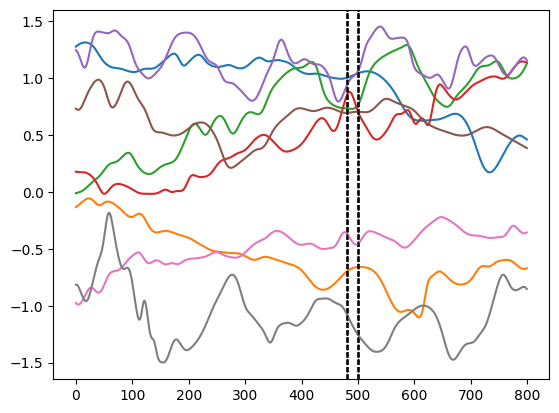

In [3]:
import matplotlib.pyplot as plt 

N, T, D = kolmo_train_arr.shape
seq_len = 20

print(N,T,D)
index = D//2+D//9
for i in range(N) : 
    plt.plot(kolmo_train_arr[i, :, index])
    plt.axvline(x = 500-seq_len, color = 'black', linestyle = '--', linewidth = 1) 
    plt.axvline(x = 500, color = 'black', linestyle = '--', linewidth = 1) 

for i in range(N):
    print(f"Trajectory {i+1}:")
    print(f"  Mean      : {np.mean(kolmo_train_arr[i]):.3f}")
    print(f"  Std Dev   : {np.std(kolmo_train_arr[i]):.3f}")
    print(f"  Max Value : {np.max(kolmo_train_arr[i]):.3f}")
    print(f"  Min Value : {np.min(kolmo_train_arr[i]):.3f}")
    print("-" * 30)  # Separator line


In [4]:
np.save("Data/Kolmogorov/kolmo_100s_8traj.npy", kolmo_train_arr)
np.save("Data/Kolmogorov/kolmo_120s_8traj.npy", kolmo_validation_arr)